In [38]:
#Importing Libraries
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

#Loading Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\Akkju\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\ed776e5a0a8c40ea9d5efbd800772ae52e140f3e (last modified on Sat Jun 14 07:58:30 2025).


In [39]:
#Cleaning Data

df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) #datetime format

df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x) #String to list

In [40]:
#Filtering for country and removing NAN values

df_US = df[df['job_country']=='United States'].dropna(subset=['salary_year_avg'])

In [41]:
job_titles= df_US['job_title_short'].value_counts().index[:6].to_list()
job_titles.sort()
job_titles

['Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Senior Data Analyst',
 'Senior Data Engineer',
 'Senior Data Scientist']

In [49]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [52]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].agg('median').sort_values(ascending=False).index #Sorting

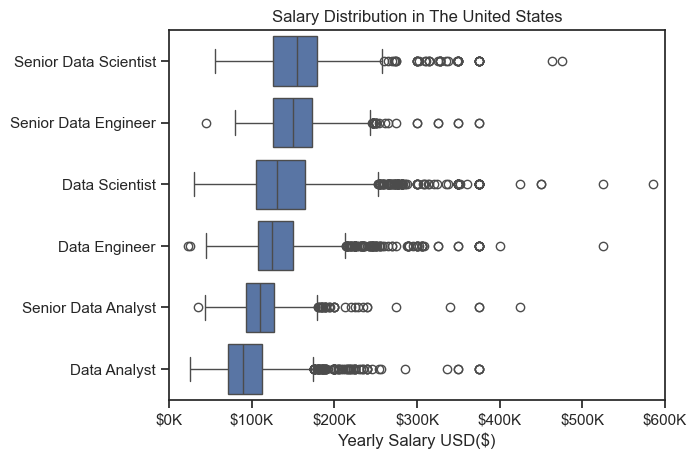

In [55]:
sns.boxplot(data=df_US_top6, x='salary_year_avg',y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distribution in The United States')
plt.ylabel('')
plt.xlabel('Yearly Salary USD($)')
plt.xlim(0,600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

### Investigate Median Salary Vs Skill for Data Analysts

In [57]:
df_DA_US = df[(df['job_title_short']=='Data Analyst')&(df['job_country']=='United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [59]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [73]:
df_DA_Top_Pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False)

df_DA_Top_Pay = df_DA_Top_Pay.head(10)

df_DA_Top_Pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [68]:
df_DA_Top_Skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_DA_Top_Skills = df_DA_Top_Skills.head(10).sort_values(by='median', ascending=False)
df_DA_Top_Skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


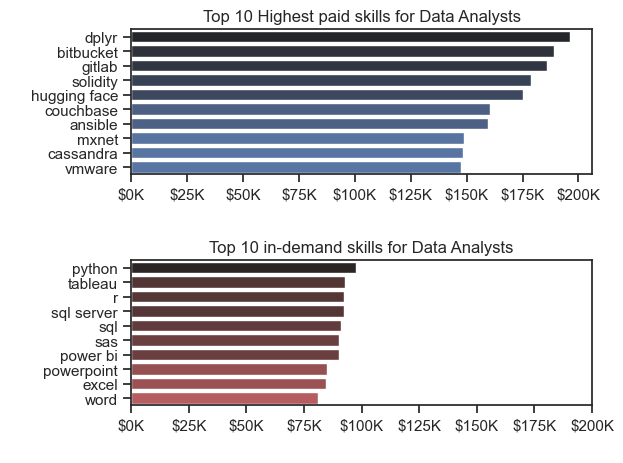

In [72]:
sns.set_theme(style='ticks')

fig, ax = plt.subplots(2,1)
sns.barplot(data=df_DA_Top_Pay, x='median',y=df_DA_Top_Pay.index,ax= ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Top 10 Highest paid skills for Data Analysts')
ax[0].set_xlabel(' ')
ax[0].set_ylabel(' ')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, i: f'${int(x/1000)}K'))

sns.barplot(data=df_DA_Top_Skills,x='median',y=df_DA_Top_Skills.index,ax=ax[1],hue ='median',palette='dark:r_r')
ax[1].legend().remove()
ax[1].set_title('Top 10 in-demand skills for Data Analysts')
ax[1].set_xlabel(' ')
ax[1].set_ylabel(' ')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, i: f'${int(x/1000)}K'))

plt.xlim(0, 200000)
fig.tight_layout()